# <p style="background-color:#34c99d; font-family:newtimeroman; color:#10284a; font-size:190%; text-align:center; border-radius:10px 10px;">Classification with Logistic Regression: Hearing Test Data</p>

<div class="alert alert-block alert-success">
    
## <span style=" color:blue">Introduction

### Logistic Regression
* Logistic Regression is **a classification algorithm** designed to **predict categorical target labels**.
* The categoricaal target column is two or more discrete class labels.
* Classification algorithms often produce a **probability** prediction of belonging to a class, such as Class 0: 10% and Class 1: 90% probability.
* Logistic Regression uses **Maximum Likelihood** to find the best fitting model. It chooses the best coefficient values in log odds terms that creates maximum likelihood.

### About the Data

An experiment was conducted on 5000 participants to study **the effects of age and physical health on hearing loss**, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's likelihood to hear the high frequency sound based solely on their features (age and physical score)?

* **Features:**

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* **Label/Target:**

    * test_result - 0 if no pass, 1 if test passed
</span>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_csv("hearing_test.csv")

In [3]:
df.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

count      mean        std   min   25%   50%   75%   max
age             5000.0  51.60900  11.287001  18.0  43.0  51.0  60.0  90.0
physical_score  5000.0  32.76026   8.169802  -0.0  26.7  35.3  38.9  50.0
test_result     5000.0   0.60000   0.489947   0.0   0.0   1.0   1.0   1.0

In [6]:
# Look at the target column more closely

df["test_result"].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

There are 3000 samples passing the test, 2000 samples failed the test.

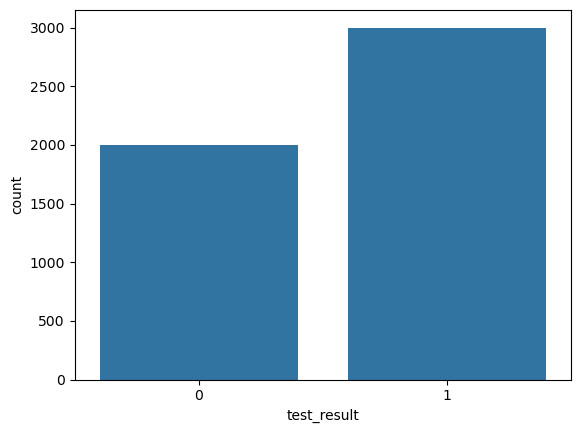

In [7]:
sns.countplot(df, x="test_result");

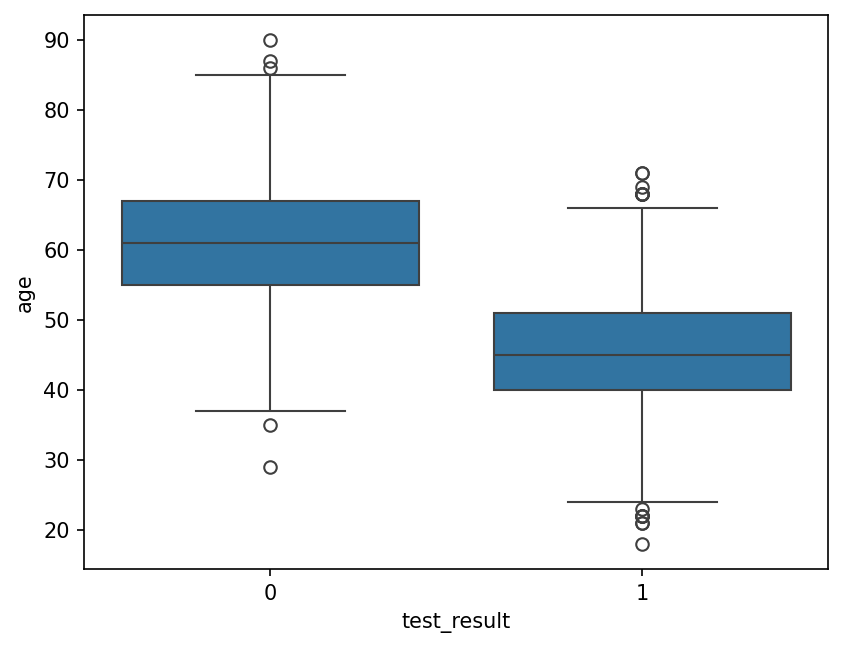

In [8]:
# test results vs age
plt.figure(dpi=150)
sns.boxplot(df, x="test_result", y="age");

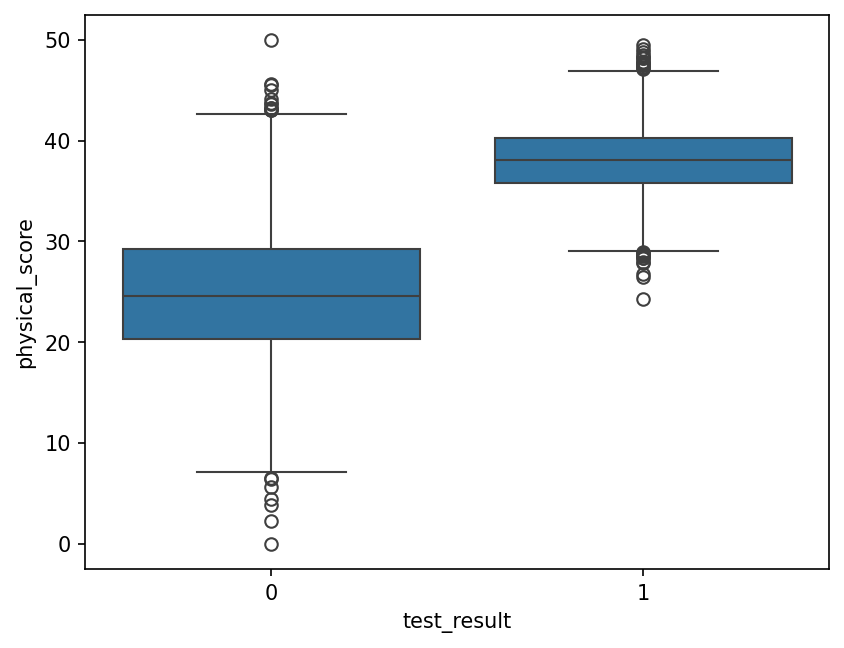

In [9]:
# test results vs physical score
plt.figure(dpi=150)
sns.boxplot(df, x="test_result", y="physical_score");

Both figues above reveal that younger people with higher physical score more likely pass the test. A scatterplot can show this relationship better:

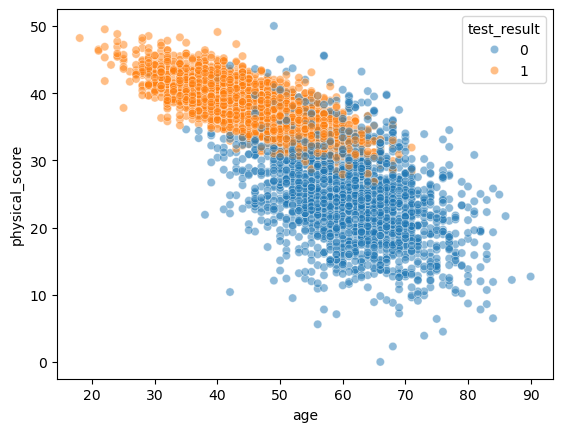

In [10]:
# Age vs physical score in scatterplot
sns.scatterplot(df, x="age", y="physical_score", hue="test_result", alpha=0.5);

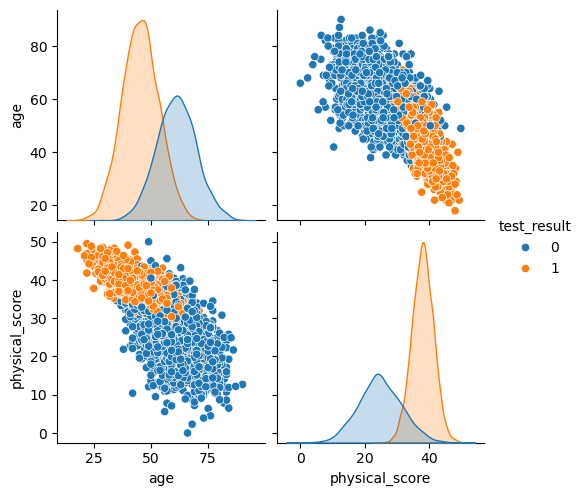

In [11]:
sns.pairplot(df, hue="test_result");

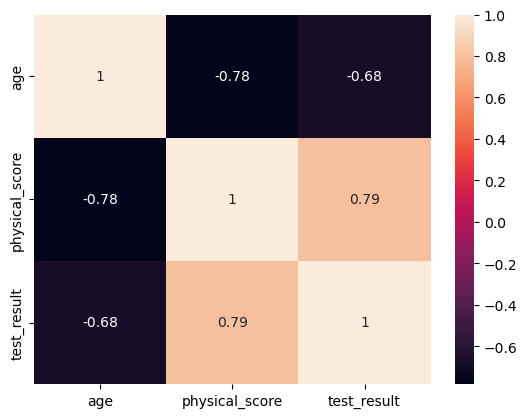

In [12]:
sns.heatmap(df.corr(), annot=True);

**Sometimes scatterplot may not be informative. So, it is better to use 3D scatterplot in such cases.** Let's draw first the scatterplots then 3D plot.

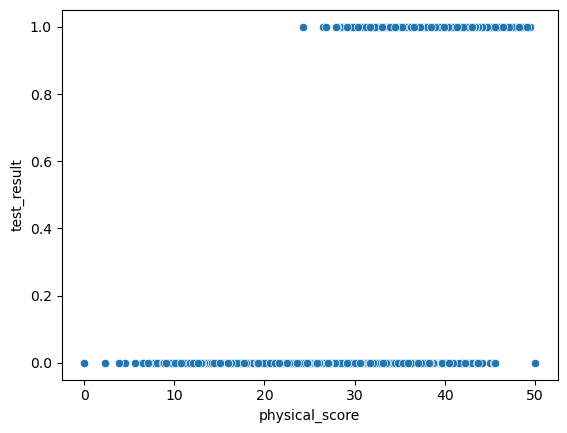

In [13]:
sns.scatterplot(df, x="physical_score", y="test_result");

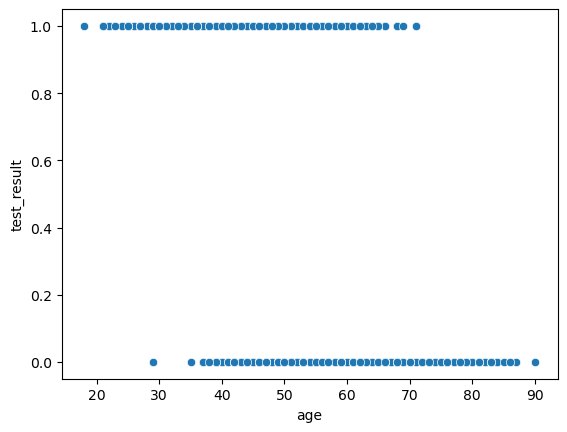

In [14]:
sns.scatterplot(df, x="age", y="test_result");

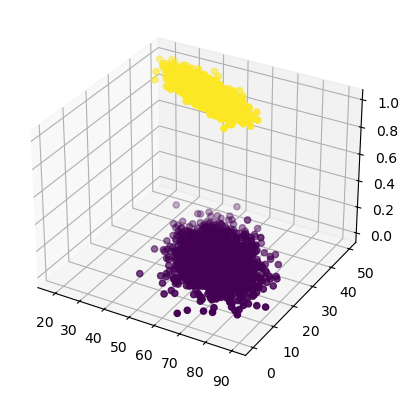

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result']);

# "c" is the color;it colors based on the test_results(0 and 1)

## Logistic Regression 

### Train | Test Split

In [16]:
X = df.drop("test_result", axis=1) # drop target variable

In [17]:
y = df["test_result"] # target variable

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# test size = 10%
# random state = 101

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train) # fit and transform for X_train
scaled_X_test = scaler.transform(X_test) # only transform for X_test

### Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
# help(LogisticRegression)

# penalty: {"l1","l2","elastic", "none"}, default="l2"
# C : float, default=1.0  (smaller values specify stronger regularization)

In [25]:
# A logistic model with default values
log_model = LogisticRegression()

In [26]:
# fit only training set (X scaled and y)
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

<div class="alert alert-block alert-info alert">

### <span style=" color:#bf2e98">Coefficient Interpretation

Things to remember:

* These coeffecients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

#### The odds ratio

For a continuous independent variable the odds ratio can be defined as:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

This exponential relationship provides an interpretation for $$\beta _{1}$$ 

The odds multiply by $${e^\beta _{1}}$$ for every 1-unit increase in x.
</div>

In [27]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

This means:
* The first number represents age and the second one represents physical score.
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

In [28]:
y_pred = log_model.predict(scaled_X_test)

In [29]:
y_pred 
# our prediction consists of zero and ones

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [30]:
# y prediction in terms of probability

y_pred_proba = log_model.predict_proba(scaled_X_test)
y_pred_proba

# Class 0 vs Class 1 probability

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

<div class="alert alert-block alert-info alert">

### <span style=" color:#bf2e98">Model Performance on Classification Tasks

#### Confusion Matrix

4 possible outcomes:
* Infected person tests positive (TP)
* Healthy person tests negative (TN)
* Infected person tests negative (FN)
* Healthy person tests positive (FP)

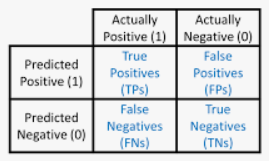

#### Classification Metrics
**1- Accuracy:** How often is the model correct? (Acc = (TP+TN)/Total) 

Accuracy Paradox: **Imbalanced classes will always result in a distorted accuracy** reflecting better performance than what is truly warranted. Imbalanced classes are ften found in real world datasets, for example, **medical conditions or fraud  credit card usage**.

**2- Recall (Sensitivity):** When it is **actually a positive case**, how often is it correct? (Recall = TP / Total number of Actual Positives)

**3- Precision:** When prediction is positive, how often is it correct? (Precision = TP / Total Predicted Positives)

Recall and Precision can help illuminated our performance specifically in regards to the relevant or positive case.

Depending on the model, there is typically a **trade-off between precision and recall**, which we can explore it with **the ROC curve**.

**4- F1-Score:** It is the **harmonic mean of precision and recall**. The harmonic mean (instead of the normal mean) allows the entire harmonic mean to go to **zero** if either precision or recall ends up being zero.
</div>

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
y_pred = log_model.predict(scaled_X_test)
y_pred  # see the predictions again

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [33]:
# accuracy_score(y_true, y_pred)
accuracy_score(y_test, y_pred)

0.93

In [34]:
confusion_matrix(y_test, y_pred)

# Explanation of the numbers below
# TP, FN
# FP, TN

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [35]:
!pip install --upgrade scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay  

# in new versions, "from sklearn.metrics import plot_confusion_matrix" is not valid

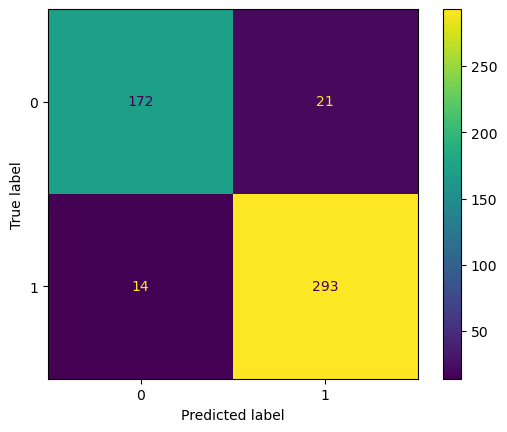

In [36]:
ConfusionMatrixDisplay.from_predictions( y_test, y_pred);

In [37]:
# Total number
len(y_test)

500

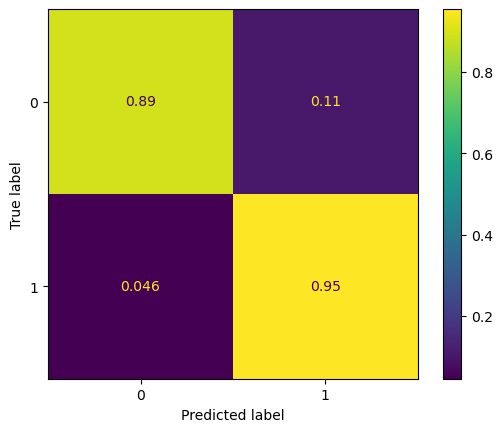

In [38]:
# See the normalized values (scaled according to max 1)
ConfusionMatrixDisplay.from_predictions( y_test, y_pred, normalize="true");

In [39]:
# See the classification metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



The precision and recall scores are supposed to be close to the accuracy score. Consider also whether the data is imbalanced or not.

In [40]:
from sklearn.metrics import precision_score, recall_score

In [41]:
recall_score(y_test,y_pred)

0.9543973941368078

<div class="alert alert-block alert-info alert">

### <span style=" color:#bf2e98">ROC Curve and AUC
* An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: 
True Positive Ra and e
False Positive Ra* The ROC Curve shows the True Positive Rate (TPR) on the y-axis against the False Positive Rate (FPR) on the x-axis. A good ROC curve has a high TPR for all FPR values, meaning it correctly identifies most positive cases while minimizing false positives. A perfect model would have a zero FPR.te

* AUC: Area Under the Curve, allows us to compare ROCs for different mode
*  In certain situations, we can accept more false positives to reduce false negatives (e.g. a dangerous virus test). lPR.

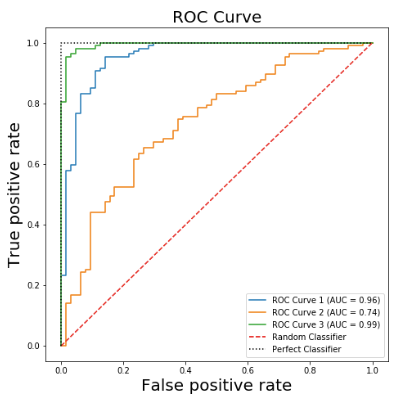

![image.png](attachment:3b1448b2-f7a3-4831-a983-b0fa4a13f8d0

</div>



In [42]:
# The codes below are not in use anymore
# from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
# plot_precision_recall_curve(log_model,scaled_X_test,y_test)
# plot_roc_curve(log_model, scaled_X_test, y_test)

In [43]:
from sklearn.metrics import PrecisionRecallDisplay

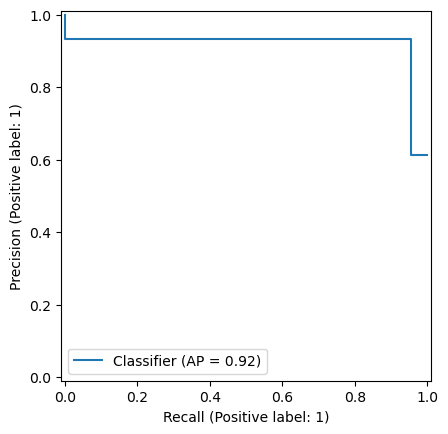

In [44]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

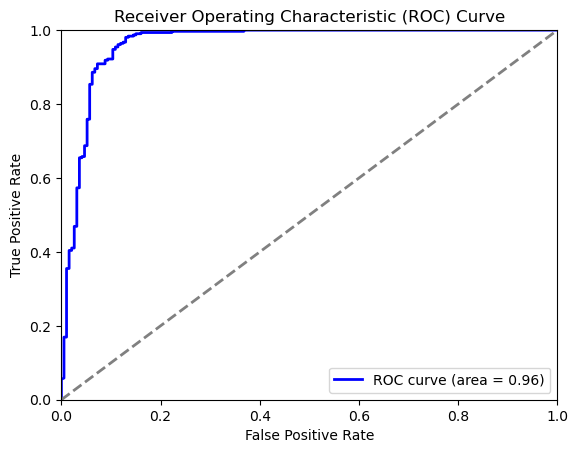

In [46]:
# Predict probabilities
y_probs = log_model.predict_proba(scaled_X_test)[:, 1]

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [47]:
# Let's take a look at the fist prediction as an example

log_model.predict_proba(scaled_X_test)[0]

array([0.02380517, 0.97619483])

It says that the first value of the "test_result" is most probably class 1.

In [48]:
# Let's check the actual class to see whether the predictio is true
y_test[0] 

1